In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve,
    classification_report,
    f1_score, roc_auc_score,
    precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay,
    average_precision_score
)

import shap

In [116]:
df = pd.read_pickle("cleaned_df.pkl")

In [117]:
num_cols = [
    "age",
    "log_wage_per_hour",
    "log_capital_gains",
    "log_capital_losses",
    "log_dividends_from_stocks",
    "num persons worked for employer",
    "weeks worked in year"
]

binary_cols = [
    "has_capital_gains",
    "has_capital_losses",
    "has_dividends_from_stocks"
]

cat_cols = [
    'class of worker','education','enroll in edu inst last wk',
    'marital stat','merge_major industry code',
    'merge_major occupation code','race','hispanic origin',
    'sex','member of a labor union','reason for unemployment',
    'full or part time employment stat','tax filer stat',
    'region of previous residence','detailed household summary in household',
    'migration code-change in reg','family members under 18',
    'merge_country of birth father','merge_country of birth mother',
    'merge_country of birth self','citizenship',
    'own business or self employed','veterans benefits','year'
]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("bin", "passthrough", binary_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [118]:
feature_cols = num_cols + binary_cols + cat_cols

X = df[feature_cols]
y = df["income_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [119]:
log_model = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ))
])

log_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers conta

In [120]:
dt_model = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(
        class_weight="balanced",
        max_depth=10
    ))
])

dt_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers conta

In [121]:
rf_model = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers conta

In [122]:
xgb_model = Pipeline([
    ("prep", preprocess),
    ("model", XGBClassifier(
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        eval_metric="logloss"
    ))
])

xgb_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers conta

In [123]:
models = {
    "Logistic": log_model,
    "DecisionTree": dt_model,
    "RandomForest": rf_model,
    "XGBoost": xgb_model
}

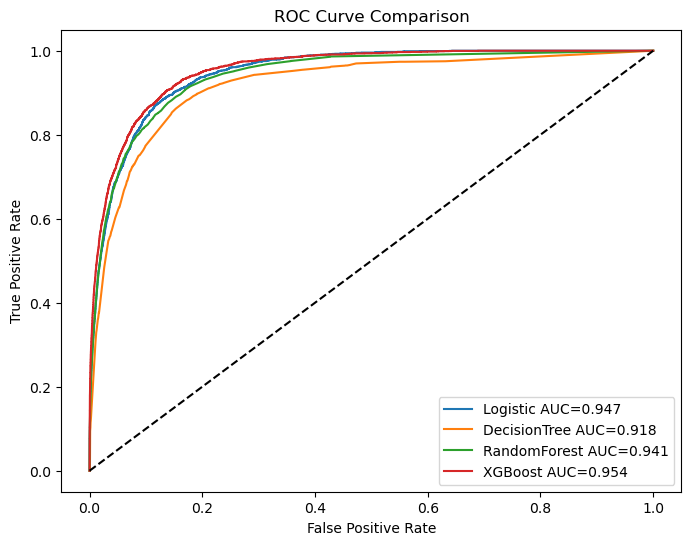

In [124]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} AUC={auc(fpr,tpr):.3f}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

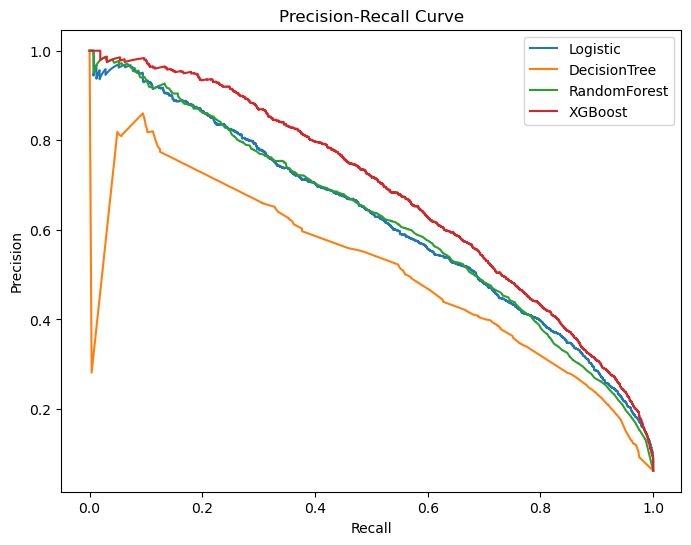

In [125]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    p, r, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(r, p, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [126]:
rows = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    rows.append([
        name,
        roc_auc_score(y_test, y_prob),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

eval_table = pd.DataFrame(
    rows,
    columns=["Model", "ROC-AUC", "Precision", "Recall", "F1"]
)

eval_table

,Model,ROC-AUC,Precision,Recall,F1
0,Logistic,0.947399,0.287324,0.896204,0.435141
1,DecisionTree,0.918190,0.253160,0.881664,0.393369
2,RandomForest,0.940897,0.708667,0.392973,0.505586
3,XGBoost,0.954004,0.339095,0.871567,0.488235


In [127]:
# XGBoost
# ----------- Train -----------
y_prob_train = xgb_model.predict_proba(X_train)[:, 1]

train_auc = roc_auc_score(y_train, y_prob_train)
train_pr_auc = average_precision_score(y_train, y_prob_train)

# ----------- Test ------------
y_prob_test = xgb_model.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_prob_test)
test_pr_auc = average_precision_score(y_test, y_prob_test)

print("Train ROC-AUC :", round(train_auc, 4))
print("Test  ROC-AUC :", round(test_auc, 4))

print("Train PR-AUC  :", round(train_pr_auc, 4))
print("Test  PR-AUC  :", round(test_pr_auc, 4))

Train ROC-AUC : 0.9723
Test  ROC-AUC : 0.954
Train PR-AUC  : 0.7461
Test  PR-AUC  : 0.679


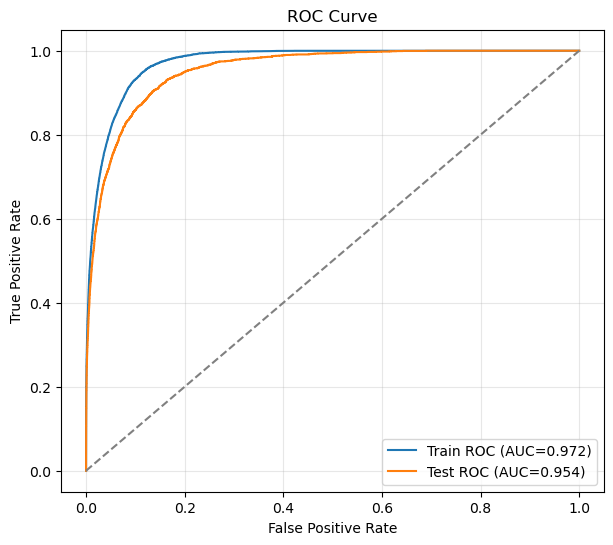

In [128]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
fpr_test,  tpr_test,  _ = roc_curve(y_test,  y_prob_test)

plt.figure(figsize=(7,6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC={train_auc:.3f})")
plt.plot(fpr_test,  tpr_test,  label=f"Test ROC (AUC={test_auc:.3f})")

# 隨機 baseline
plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

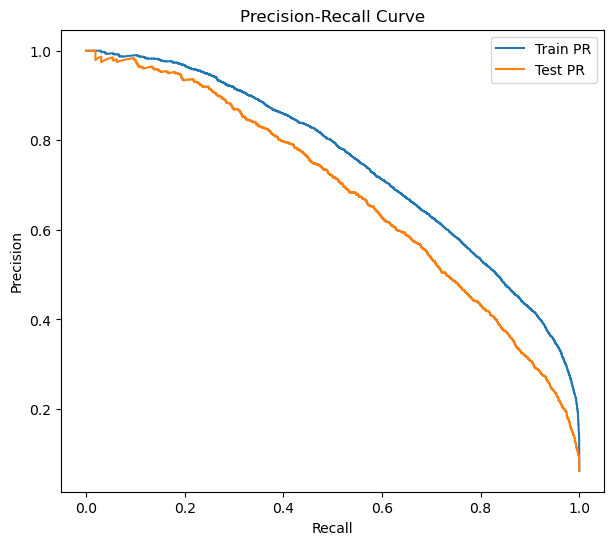

In [129]:
precision_train, recall_train, _ = precision_recall_curve(y_train, y_prob_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_prob_test)

plt.figure(figsize=(7,6))
plt.plot(recall_train, precision_train, label="Train PR")
plt.plot(recall_test, precision_test, label="Test PR")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show()

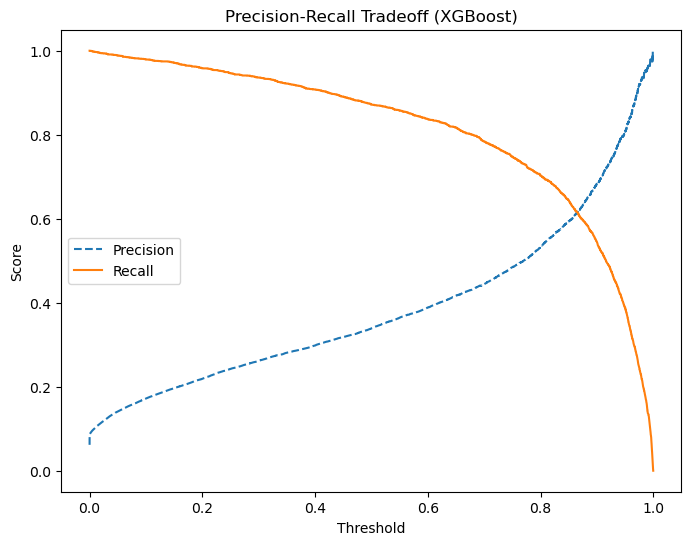

In [130]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff (XGBoost)")
plt.legend()
plt.show()

In [131]:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)
print("Best F1:", f1_scores[best_idx])

Best threshold: 0.84920514
Best F1: 0.6189278111089607


In [132]:
thresholds = np.linspace(0, 1, 200)

best_cost = float("inf")
best_threshold = None
best_f1 = None
best_precision = None
best_recall = None

C_FP = 10
C_FN = 100

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    cost = fp * C_FP + fn * C_FN
    
    # F1
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    
    if cost < best_cost:
        best_cost = cost
        best_threshold = t
        best_f1 = f1
        best_precision = precision
        best_recall = recall

print("Best threshold (min cost):", best_threshold)
print("Minimum cost:", best_cost)
print("F1 at best cost threshold:", best_f1)
print("Precision:", best_precision)
print("Recall:", best_recall)

Best threshold (min cost): 0.5527638190954774
Minimum cost: 72120
F1 at best cost threshold: 0.513180169286578
Precision: 0.36624093890231274
Recall: 0.8570274636510501


In [133]:
# confusion matrix
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("Threshold used:", best_threshold)
y_pred_best = (y_prob >= best_threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix at Best Threshold")
print("----------------------------------")
print(f"TN (Correctly predicted low income): {tn}")
print(f"FP (Predicted high but actually low): {fp}")
print(f"FN (Missed high income): {fn}")
print(f"TP (Correctly predicted high income): {tp}")

Threshold used: 0.5527638190954774
Confusion Matrix at Best Threshold
----------------------------------
TN (Correctly predicted low income): 33757
FP (Predicted high but actually low): 3672
FN (Missed high income): 354
TP (Correctly predicted high income): 2122


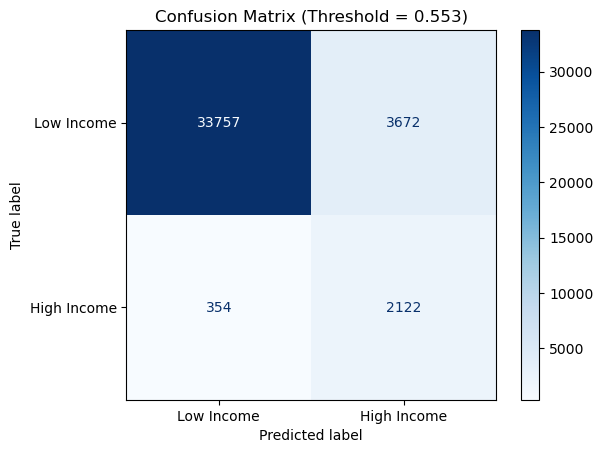

In [134]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Income", "High Income"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (Threshold = {best_threshold:.3f})")
plt.show()

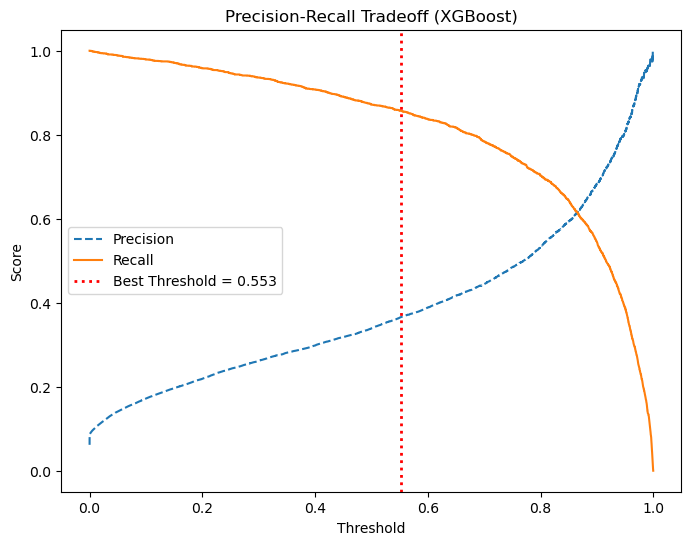

In [135]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,6))

plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recalls[:-1], label="Recall")

plt.axvline(x=best_threshold, color="red", linestyle=":", linewidth=2,
            label=f"Best Threshold = {best_threshold:.3f}")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff (XGBoost)")
plt.legend()
plt.show()

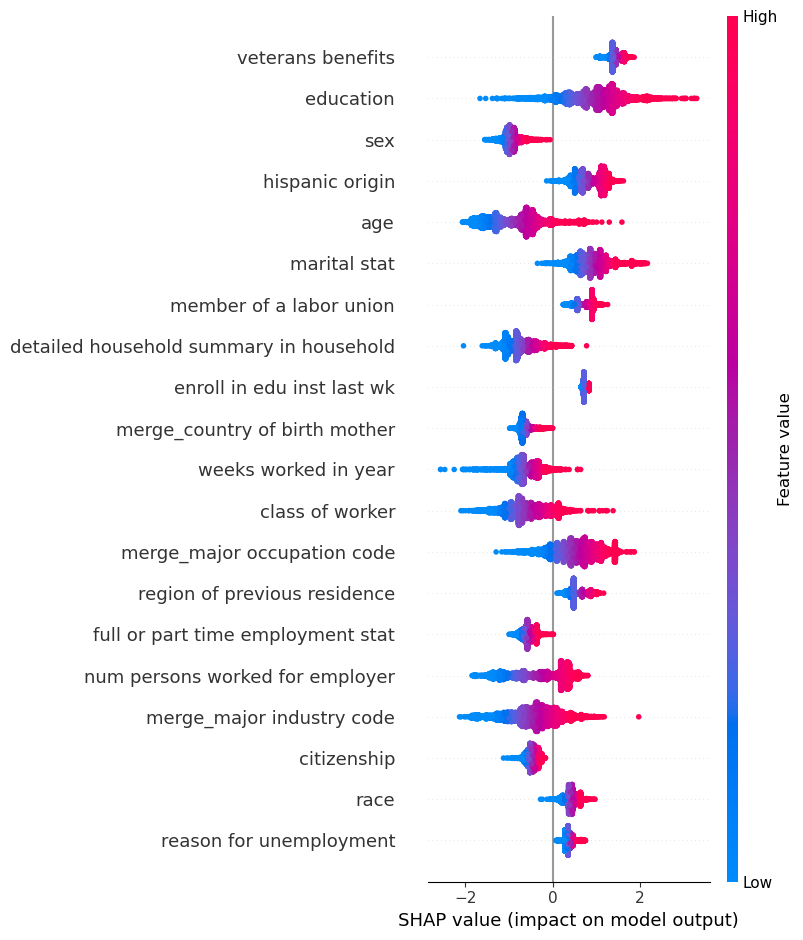

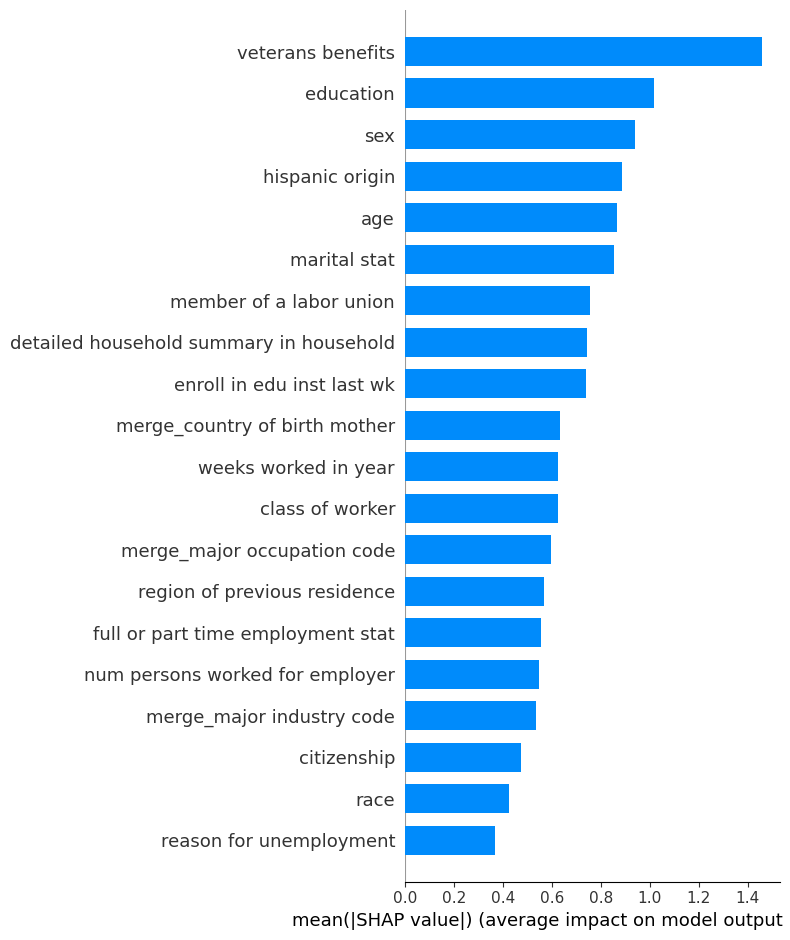


Top 15 grouped features by mean(|SHAP|):
veterans benefits                          1.457831
education                                  1.016027
sex                                        0.938071
hispanic origin                            0.887555
age                                        0.865186
marital stat                               0.852475
member of a labor union                    0.754150
detailed household summary in household    0.743405
enroll in edu inst last wk                 0.739061
merge_country of birth mother              0.632662
weeks worked in year                       0.623339
class of worker                            0.623246
merge_major occupation code                0.595416
region of previous residence               0.568816
full or part time employment stat          0.556900
dtype: float32


In [136]:
prep = xgb_model.named_steps["prep"]
model = xgb_model.named_steps["model"]

X_test_transformed = prep.transform(X_test)

if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()

X_test_transformed = X_test_transformed.astype(float)

feature_names = prep.get_feature_names_out()

booster = model.get_booster()
explainer = shap.TreeExplainer(booster)

shap_values = explainer.shap_values(X_test_transformed)

mask_high = (y_pred_best == 1)

shap_high = shap_values[mask_high]

shap_df_high = pd.DataFrame(shap_high, columns=feature_names)

group_map = {}
for col in shap_df_high.columns:
    if col.startswith("cat__"):
        without_prefix = col.replace("cat__", "")
        group = "_".join(without_prefix.split("_")[:-1])
    elif col.startswith("num__"):
        group = col.replace("num__", "")
    else:
        group = col
    group_map[col] = group

grouped_shap_high = shap_df_high.T.groupby(group_map).sum().T

shap.summary_plot(
    grouped_shap_high.values,
    features=grouped_shap_high.values,
    feature_names=grouped_shap_high.columns,
    show=True
)

shap.summary_plot(
    grouped_shap_high.values,
    features=grouped_shap_high.values,
    feature_names=grouped_shap_high.columns,
    plot_type="bar",
    show=True
)

importance = np.abs(grouped_shap_high).mean().sort_values(ascending=False)
print("\nTop 15 grouped features by mean(|SHAP|):")
print(importance.head(15))

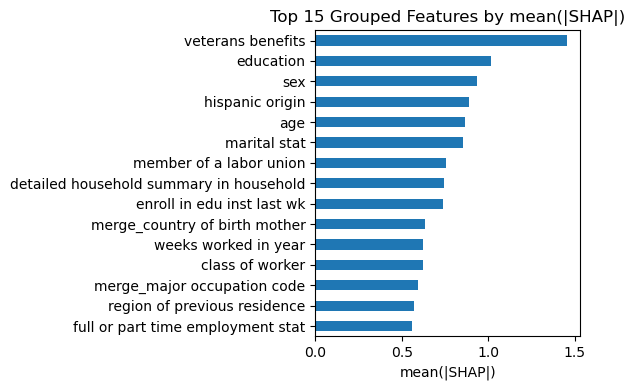

In [144]:
# ================================
# Top-15 importance
# ================================
importance = np.abs(grouped_shap_high).mean().sort_values(ascending=False)

top_k = 15
top_features = importance.head(top_k).sort_values()


plt.figure(figsize=(6, 4))

top_features.plot(kind="barh")

plt.title("Top 15 Grouped Features by mean(|SHAP|)")
plt.xlabel("mean(|SHAP|)")
plt.tight_layout()
plt.show()


Top TP grouped features:
veterans benefits                          1.463851
education                                  0.972309
sex                                        0.931713
age                                        0.877851
hispanic origin                            0.852308
marital stat                               0.805301
member of a labor union                    0.764713
detailed household summary in household    0.744041
enroll in edu inst last wk                 0.738989
class of worker                            0.720957
dtype: float32

Top FP grouped features:
veterans benefits                          1.454353
education                                  1.041292
sex                                        0.941745
hispanic origin                            0.907925
marital stat                               0.879736
age                                        0.857868
member of a labor union                    0.748046
detailed household summary in household    0.7430

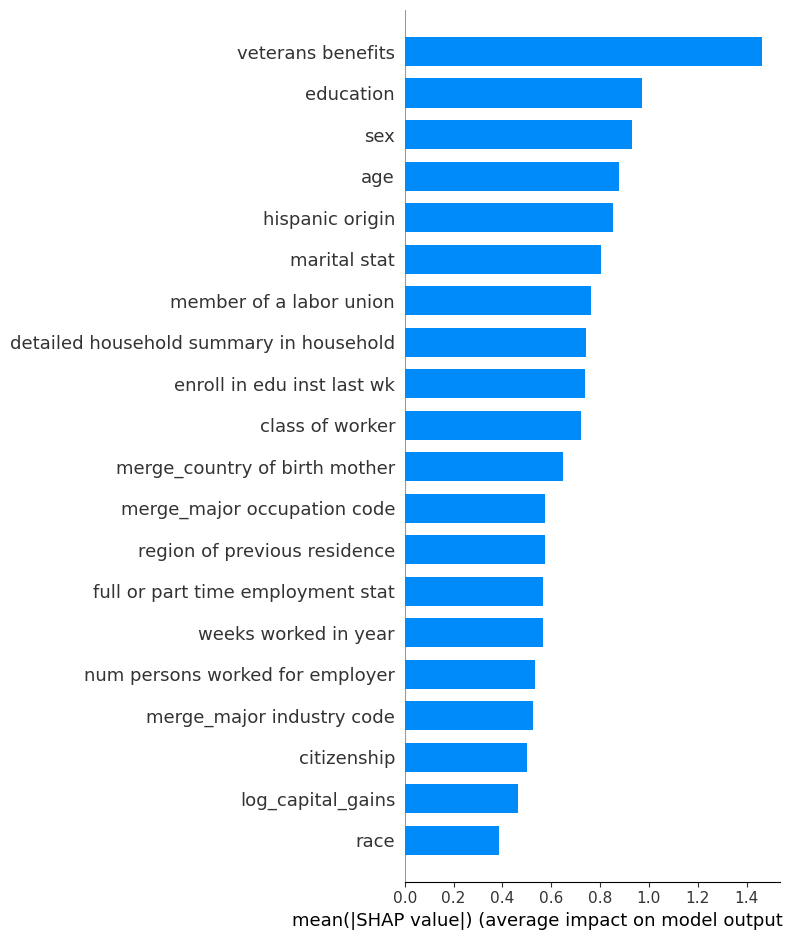

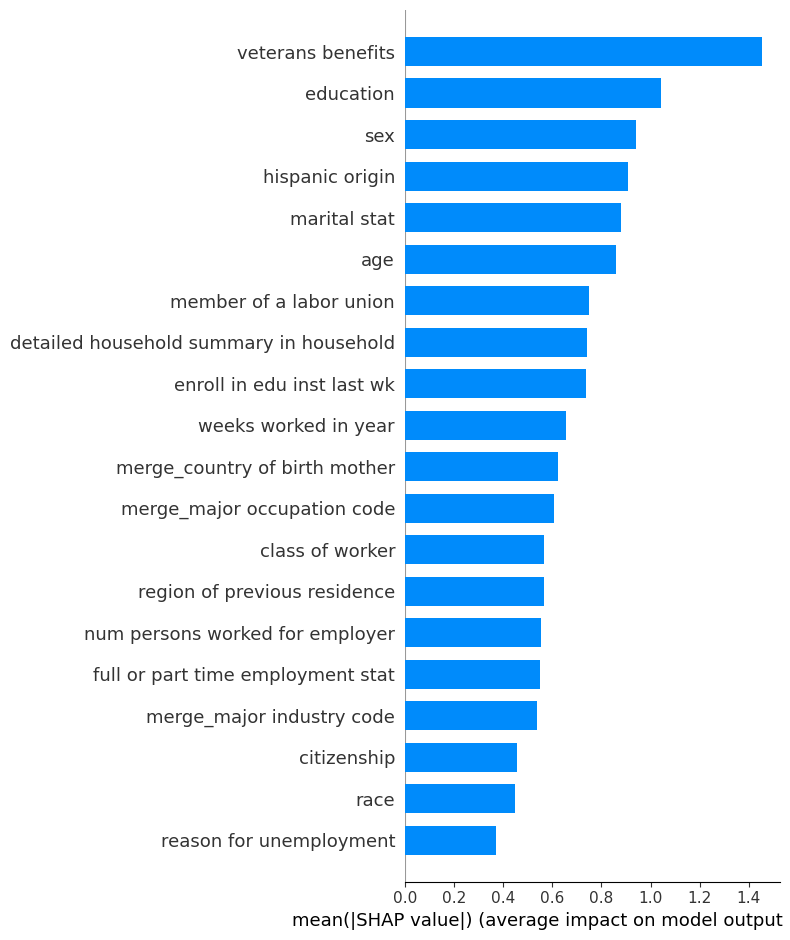

In [137]:
# ================================
# TP / FP masks
# ================================
mask_tp = (y_test == 1) & (y_pred_best == 1)
mask_fp = (y_test == 0) & (y_pred_best == 1)

# ================================
# TP SHAP
# ================================
shap_tp = shap_values[mask_tp]
shap_df_tp = pd.DataFrame(shap_tp, columns=feature_names)

grouped_shap_tp = shap_df_tp.T.groupby(group_map).sum().T

# ================================
# FP SHAP
# ================================
shap_fp = shap_values[mask_fp]
shap_df_fp = pd.DataFrame(shap_fp, columns=feature_names)

grouped_shap_fp = shap_df_fp.T.groupby(group_map).sum().T

# ================================
# Bar plot comparison
# ================================

print("\nTop TP grouped features:")
print(np.abs(grouped_shap_tp).mean().sort_values(ascending=False).head(10))

print("\nTop FP grouped features:")
print(np.abs(grouped_shap_fp).mean().sort_values(ascending=False).head(10))

# Plot TP
shap.summary_plot(
    grouped_shap_tp.values,
    features=grouped_shap_tp.values,
    feature_names=grouped_shap_tp.columns,
    plot_type="bar",
    show=True
)

# Plot FP
shap.summary_plot(
    grouped_shap_fp.values,
    features=grouped_shap_fp.values,
    feature_names=grouped_shap_fp.columns,
    plot_type="bar",
    show=True
)


In [138]:
tp_mean = np.abs(grouped_shap_tp).mean()
fp_mean = np.abs(grouped_shap_fp).mean()

tp_mean, fp_mean = tp_mean.align(fp_mean, fill_value=0)

diff = tp_mean - fp_mean

diff_sorted = diff.sort_values(ascending=False)

print("\nFeatures that distinguish TP from FP (positive = stronger in TP):")
print(diff_sorted.head(15))

print("\nFeatures stronger in FP (potential misleading features):")
print(diff_sorted.tail(15))


Features that distinguish TP from FP (positive = stronger in TP):
log_capital_gains                          0.289759
class of worker                            0.154177
log_capital_losses                         0.069664
log_dividends_from_stocks                  0.053213
citizenship                                0.042508
migration code-change in reg               0.028209
merge_country of birth mother              0.024773
age                                        0.019983
member of a labor union                    0.016668
full or part time employment stat          0.013500
own business or self employed              0.012380
veterans benefits                          0.009498
merge_country of birth self                0.007041
region of previous residence               0.005982
detailed household summary in household    0.001003
dtype: float32

Features stronger in FP (potential misleading features):
bin__has_capital_gains             0.000000
enroll in edu inst last wk        -0

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.


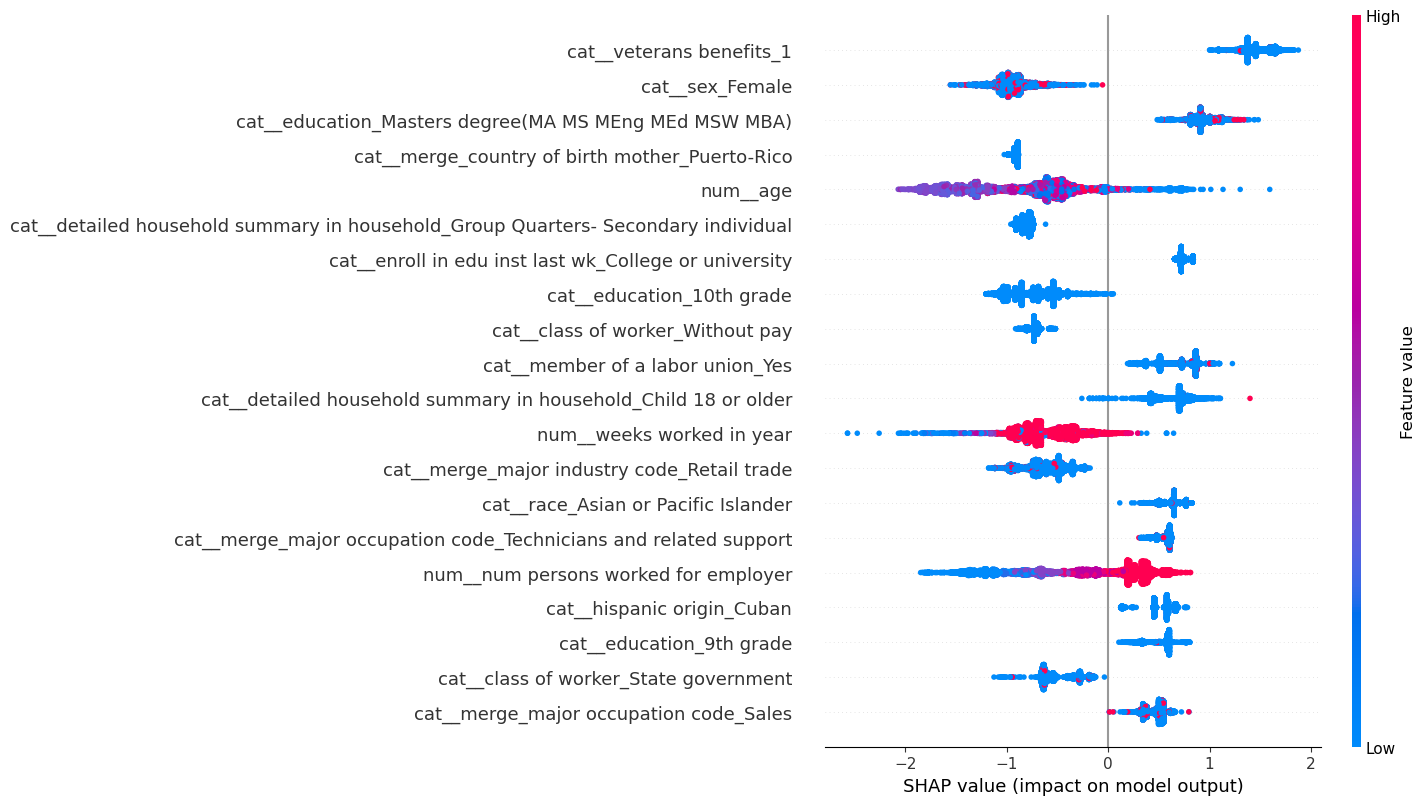

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.


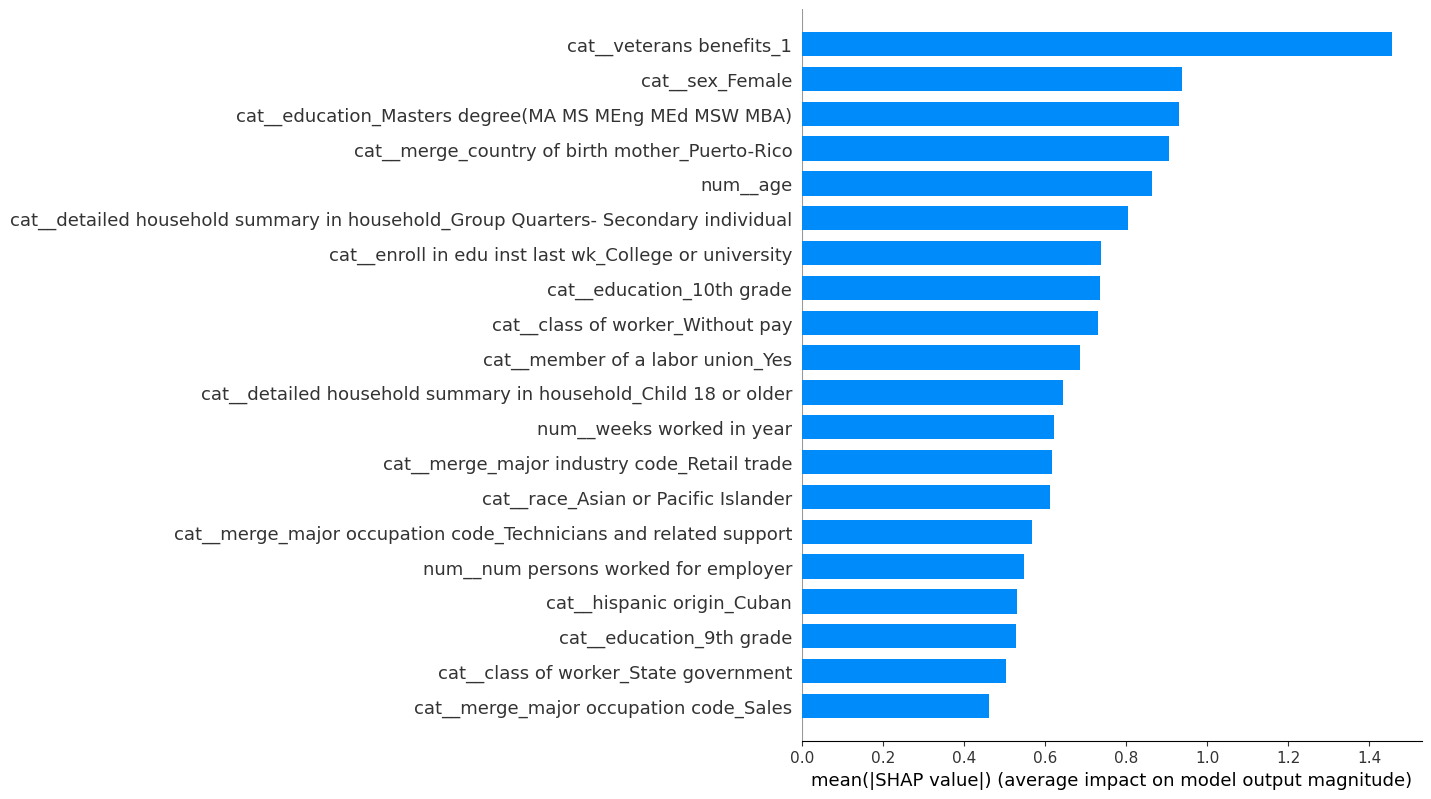


Top 20 dummy-level features by mean(|SHAP|):
cat__veterans benefits_1                                                             1.457650
cat__sex_Female                                                                      0.938071
cat__education_Masters degree(MA MS MEng MEd MSW MBA)                                0.931100
cat__merge_country of birth mother_Puerto-Rico                                       0.906368
num__age                                                                             0.865186
cat__detailed household summary in household_Group Quarters- Secondary individual    0.805717
cat__enroll in edu inst last wk_College or university                                0.739237
cat__education_10th grade                                                            0.735159
cat__class of worker_Without pay                                                     0.729992
cat__member of a labor union_Yes                                                     0.686292
cat__detailed 

In [141]:
# ================================
# SHAP for predicted high income (no grouping)
# ================================

mask_high = (y_pred_best == 1)

shap_high = shap_values[mask_high]
X_high = X_test_transformed[mask_high]

shap_df_high = pd.DataFrame(shap_high, columns=feature_names)

# ================================
# Summary Plot
# ================================
shap.summary_plot(
    shap_high,
    features=X_high,
    feature_names=feature_names,
    show=True
)

# ================================
# Bar Plot（mean |SHAP|）
# ================================
shap.summary_plot(
    shap_high,
    features=X_high,
    feature_names=feature_names,
    plot_type="bar",
    show=True
)

# ================================
# 印出 Top 20 dummy features
# ================================
importance_dummy = np.abs(shap_df_high).mean().sort_values(ascending=False)

print("\nTop 20 dummy-level features by mean(|SHAP|):")
print(importance_dummy.head(20))

In [139]:
ct = (
        pd.crosstab(df["veterans benefits"], df["income_binary"], normalize="index") * 100
    ).round(2)

ct = ct.rename(columns={0: "income_0_%", 1: "income_1_%"})

ct = ct.sort_values("income_1_%", ascending=False)

display(ct)

income_binary,income_0_%,income_1_%
veterans benefits,,
1,88.36,11.64
2,91.91,8.09
0,100.00,0.00


In [140]:
df.groupby("veterans benefits")["age"].mean()

veterans benefits
0     6.986479
1    59.863911
2    42.845494
Name: age, dtype: float64